In [116]:
import numpy as np
import sys
!{sys.executable} -m pip install pertdist
from pert import PERT
import matplotlib.pyplot as plt
%matplotlib inline

# simulation function

In [180]:
def Proj_simulation(H,B,C,D,F,G_Predecessor,G):   #H to the front 
    '''
    Input:
    
    0: for no crash/no intern
    1: for crash/with intern
    
    G_Predecessor: 0 for after D, 1 for after F
    
    H: 0 for logistic model, 1 for tree based model, 
       2 for deep learning model
    '''
    #result = {'Duration':-999,'Profit':-999}
    result = [-999,-999]
    
    if 3*B+2*D+2*F+3*G > 7:
        return result
    
    intern = 0
    model_accuracy = 0
    test_sys_cost = 0
    interp_bonus = 0
    
    taskA = 2
    
    #B after A
    taskB = 5 - B*2
    intern += taskB*B
        
    #C after B
    taskC = 3 - C*2  
    
    #D,E after C
    taskD = 4 - D*2
    intern += taskD*D   
    taskE = 5   #not on critical path
    
    #F after d
    taskF = 3 - F*1
    intern += taskF*F
        
    #G after D or F   
    model_accuracy += 0.03*G_Predecessor 
    taskG = 5 - G*2
    intern += taskG*G

    #H after G, I/J after H 
    if H == 0:    #logistic model
        taskH = 1.5 + max(3,1) #train+test/interpretation
        test_sys_cost += 3*100
        interp_bonus = 10000
        Opt,ML,Pess = 0.7,0.8,0.9
        sim = PERT(Opt,ML,Pess).rvs(1)[0]
        while model_accuracy+sim < 0.8:
            taskH += (taskG/2 + taskH)  #??? taskH = taskH +(taskG/2 + taskH)
            intern += taskG/2*G
            
            if intern > 10:
                return result
            
            test_sys_cost += 3*100
            Opt += 0.05
            ML += 0.05
            Pess += 0.05
            sim = PERT(Opt,ML,Pess).rvs(1)[0]
        model_accuracy += sim
        model_accuracy = min(1,model_accuracy)
    elif H == 1:   #tree based model
        taskH = 3 + max(3,2)
        test_sys_cost += 3*100
        interp_bonus = 2000
        if np.random.rand() < 0.9:  #system didn't crash
            Opt,ML,Pess=0.7,0.85,0.9
            sim = PERT(Opt,ML,Pess).rvs(1)[0]
            while model_accuracy+sim < 0.8:
                taskH += (taskG/2 + taskH) 
                intern += taskG/2*G
                
                if intern > 10:
                    return result
                
                test_sys_cost += 3*100
                Opt += 0.05
                ML += 0.05
                Pess += 0.05
                sim = PERT(Opt,ML,Pess).rvs(1)[0]
            model_accuracy += sim
            model_accuracy = min(1,model_accuracy)
        else:  #system crashed
            taskH += 3
            Opt,ML,Pess=0.7,0.85,0.9
            sim = PERT(Opt,ML,Pess).rvs(1)[0]
            while model_accuracy+sim < 0.8:
                taskH += (taskG/2 + taskH)
                intern += taskG/2*G
                
                if intern > 10:
                    return result
                
                test_sys_cost += 3*100
                Opt += 0.05
                ML += 0.05
                Pess += 0.05
                sim = PERT(Opt,ML,Pess).rvs(1)[0]
            model_accuracy += sim 
            model_accuracy = min(1,model_accuracy)
    else:   #deep learning model
        taskH = 4 + max(3,5)
        test_sys_cost += 3*100
        interp_bonus = 1000
        if np.random.rand() < 0.8:  #system didn't crash
            Opt,ML,Pess=0.7,0.85,0.9
            sim = PERT(Opt,ML,Pess).rvs(1)[0]
            while model_accuracy+sim < 0.8:
                taskH += (taskG/2 + taskH)
                intern += taskG/2*G
                
                if intern > 10:
                    return result
                
                test_sys_cost += 3*100
                Opt += 0.05
                ML += 0.05
                Pess += 0.05
                sim = PERT(Opt,ML,Pess).rvs(1)[0]
            model_accuracy += sim
            model_accuracy = min(1,model_accuracy)
        else:   #system crashed
            taskH += 3
            Opt,ML,Pess=0.75,0.9,0.95
            sim = PERT(Opt,ML,Pess).rvs(1)[0]
            while model_accuracy+sim < 0.8:
                taskH += (taskG/2 + taskH)
                intern += taskG/2*G
                
                if intern > 10:
                    return result
                
                test_sys_cost += 3*100
                Opt += 0.05
                ML += 0.05
                Pess += 0.05
                sim = PERT(Opt,ML,Pess).rvs(1)[0]
            model_accuracy += sim
            model_accuracy = min(1,model_accuracy)
    
    #K after I/J
    taskK = 2 + max(B,D,F,G)
    
    total_duration = taskA + taskB + taskC + max(taskD + taskF*G_Predecessor + taskG,taskE) + taskH + taskK 
    #overhead cost $160/day, intern $100/day, test systm cost $100/model/day
    Profit = 100000*model_accuracy + interp_bonus - 160*total_duration - 100*intern - test_sys_cost - 380*C - [0,2999][total_duration>=23]
    
    #result['Duration'] = total_duration
    #result['Profit'] = round(Profit)
    result[0] = total_duration
    result[1] = round(Profit)
    
    return result


# Combination of task crash

In [179]:
import itertools
lst = list(itertools.product([0, 1], repeat=6))
lst

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [184]:
def comb_mean(model,i):
    dur = []
    prof = []
    for j in range(500):
        pred = Proj_simulation(model,lst[i][0],lst[i][1],lst[i][2],lst[i][3],lst[i][4],lst[i][5])
        if pred[0] > 0 and pred[1] > 0:
            dur.append(pred[0]) 
            prof.append(pred[1])
    return [np.mean(dur),np.mean(prof)]

In [185]:
#logistic model
dur_logi = []   #mean duration of 128 combinations using model 0
profit_logi = []   #mean profit of 128 combinations using model 0
for i in range(len(lst)):
    dur_logi.append(comb_mean(0,i)[0])
    profit_logi.append(comb_mean(0,i)[1])

/Users/mac/opt/anaconda3/envs/envTF22/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mac/opt/anaconda3/envs/envTF22/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [198]:
#tree model
dur_tree = []   #mean duration of 128 combinations using model 1
profit_tree = []   #mean profit of 128 combinations using model 1
for i in range(len(lst)):
    dur_tree.append(comb_mean(1,i)[0])
    profit_tree.append(comb_mean(1,i)[1])

In [204]:
#deep learning model
dur_deep = []   #mean duration of 128 combinations using model 2
profit_deep = []   #mean profit of 128 combinations using model 2
for i in range(len(lst)):
    dur_deep.append(comb_mean(2,i)[0])
    profit_deep.append(comb_mean(2,i)[1])

### Q1

In [210]:
print('Max Profit Logit: ',profit_logi[profit_logi.index(max(profit_logi))])                #62
print('Crash Decision: ',lst[profit_logi.index(max(profit_logi))])

Max Profit Logit:  89609.938
Crash Decision:  (1, 1, 1, 1, 1, 0)


In [211]:
print('Max Profit Tree: ',profit_tree[profit_tree.index(max(profit_tree))])                #25
print('Crash Decision: ',lst[profit_tree.index(max(profit_tree))])

Max Profit Tree:  81613.85
Crash Decision:  (0, 1, 1, 0, 0, 1)


In [212]:
print('Max Profit Deep Learning: ',profit_deep[profit_deep.index(max(profit_deep))])           #30
print('Crash Decision: ',lst[profit_deep.index(max(profit_deep))])

Max Profit Deep Learning:  80296.648
Crash Decision:  (0, 1, 1, 1, 1, 0)


In [227]:
top_logi_index = sorted([x for x in profit_logi if str(x) != 'nan'])[-5:]
comb_logi = [lst[profit_logi.index(i)] for i in top_logi_index]

[(0, 1, 1, 0, 0, 0),
 (1, 1, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, 0)]

In [336]:
dur_dist = []
prof_dist = []
for i in range(500):
    dur_dist.append(Proj_simulation(0,1,1,1,1,1,0)[0])
    prof_dist.append(Proj_simulation(0,1,1,1,1,1,0)[1])
dur_dist = [x for x in dur_dist if str(x) != 'nan']
prof_dist = [x for x in prof_dist if str(x) != 'nan']

Text(0, 0.5, 'Count')

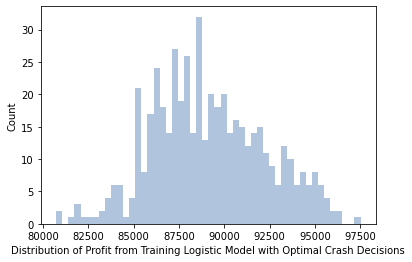

In [265]:
plt.hist(prof_dist,bins=50,color='lightsteelblue')
plt.xlabel('Distribution of Profit from Training Logistic Model with Optimal Crash Decisions')
plt.ylabel('Count')

# Q2

### logi

In [311]:
tc_dur_logi = []
tc_prof_logi = []
tc_crash_logi = []
for i in range(len(dur_logi)):
    if dur_logi[i] <= 25:
        tc_dur_logi.append(dur_logi[i])
        tc_prof_logi.append(profit_logi[i])
        tc_crash_logi.append(lst[i])
tc_dur_logi

[24.028, 24.88, 24.328, 23.736, 23.884, 24.712, 24.504, 24.826, 24.194]

In [309]:
def logi_confidence():
    dur_dist = []
    prof_dist = []
    for i in range(500):
        dur_dist.append(Proj_simulation(0,0,1,1,1,1,1)[0])
        prof_dist.append(Proj_simulation(0,0,1,1,1,1,1)[1])
    dur_dist = [x for x in dur_dist if str(x) != 'nan']
    prof_dist = [x for x in prof_dist if str(x) != 'nan']
    return len([x for x in dur_dist if x <=28])/500
np.mean([logi_confidence() for i in range(100)])

0.76214

## Tree

In [317]:
tc_dur = []
tc_prof = []
tc_crash = []
for i in range(len(dur_logi)):
    if dur_logi[i] <= 25:
        tc_dur.append(dur_tree[i])
        tc_prof.append(profit_tree[i])
        tc_crash.append(lst[i])
tc_dur

[23.935, 25.774, 23.809, 24.882, 24.175, 25.786, 24.305, 23.902, 24.79]

In [316]:
def logi_confidence():
    dur_dist = []
    prof_dist = []
    for i in range(500):
        dur_dist.append(Proj_simulation(1,1,1,1,1,0,0)[0])
        prof_dist.append(Proj_simulation(1,1,1,1,1,0,0)[1])
    dur_dist = [x for x in dur_dist if str(x) != 'nan']
    prof_dist = [x for x in prof_dist if str(x) != 'nan']
    return len([x for x in dur_dist if x <=28])/500
np.mean([logi_confidence() for i in range(100)])

0.8111400000000001

## Deep

In [330]:
tc_dur = []
tc_prof = []
tc_crash = []
for i in range(len(dur_logi)):
    if dur_deep[i] <= 28:
        tc_dur.append(dur_deep[i])
        tc_prof.append(profit_deep[i])
        tc_crash.append(lst[i])
tc_dur

[27.589, 27.211, 27.969, 27.679, 27.49, 27.572]

In [331]:
tc_crash

[(0, 1, 1, 0, 0, 1),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 1),
 (1, 1, 0, 0, 0, 1),
 (1, 1, 1, 0, 0, 0),
 (1, 1, 1, 1, 0, 0)]

In [334]:
def logi_confidence():
    dur_dist = []
    prof_dist = []
    for i in range(500):
        dur_dist.append(Proj_simulation(2,0,1,1,1,1,1)[0])
        prof_dist.append(Proj_simulation(2,0,1,1,1,1,1)[1])
    dur_dist = [x for x in dur_dist if str(x) != 'nan']
    prof_dist = [x for x in prof_dist if str(x) != 'nan']
    return len([x for x in dur_dist if x <=28])/500
np.mean([logi_confidence() for i in range(100)])

0.7573999999999999

Text(0, 0.5, 'Count')

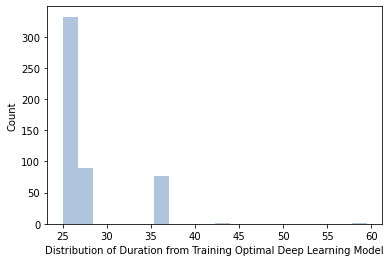

In [338]:
def logi_confidence():
    dur_dist = []
    prof_dist = []
    for i in range(500):
        dur_dist.append(Proj_simulation(2,1,1,1,0,0,0)[0])
        prof_dist.append(Proj_simulation(2,1,1,1,0,0,0)[1])
    dur_dist = [x for x in dur_dist if str(x) != 'nan']
    prof_dist = [x for x in prof_dist if str(x) != 'nan']
    return dur_dist
dd = logi_confidence()
plt.hist(dd,bins=20,color='lightsteelblue')
plt.xlabel('Distribution of Duration from Training Optimal Deep Learning Model')
plt.ylabel('Count')